# Visualization of the Graphene Cell

In [1]:
# %load ../include/header.py
import numpy as np
import matplotlib.pyplot as plt
from graphenetools import gt
import re,glob,os
from scipy.interpolate import interp1d
import sys,importlib
from collections import defaultdict
from numpy import pi as π
import dgutils

# Notebook display options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','sans':'../include/sans_NC.mplstyle', 'aps':'../include/aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize']

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# setup a possible custom font path
font_path,bold_font_path = '.','.'
if 'LOCAL_FONT_PATH' in os.environ:
    font_path = os.environ['LOCAL_FONT_PATH'] + os.path.sep + 'HelveticaNeue/HelveticaNeue-Light-08.ttf'
    bold_font_path = os.environ['LOCAL_FONT_PATH'] + os.path.sep + 'HelveticaNeue/HelveticaNeue-Bold-02.ttf'

### Visualization Specific

In [3]:
import dgutils.pypov as pypov
from PIL import Image,ImageOps
from vapory import *
import dgutils.colors as colortools

included = ["colors.inc","textures.inc","functions.inc"]
filename = "../plots/graphene_cell.pov"

π = np.pi

## Setting the colors

In [4]:
#blue = colortools.hex_to_rgb('#0073CD')
#grey = colortools.hex_to_rgb('#a7a7a7')
#brown = colortools.hex_to_rgb('#e9b68c')
#brown = colortools.hex_to_rgb('#926f34')
#green = colortools.hex_to_rgb('#15A05E')

blue = colortools.hex_to_rgb('#0073CD')
grey = colortools.hex_to_rgb('#303030')
brown = colortools.hex_to_rgb('#e9b68c')
brown = colortools.hex_to_rgb('#926f34')
green = colortools.hex_to_rgb('#22b2aa')
orange = colortools.hex_to_rgb('#FF8200')
sky = colortools.hex_to_rgb('#98a4bc')

## Construct the graphene lattice, $\sqrt{3}\times\sqrt{3}$ adsorbant and bonds

In [5]:
# lattice vectors
aₒ = 1.42
a = (aₒ/2)*np.array([[np.sqrt(3),-np.sqrt(3)],[3,3]])

#√3 x √3
θ = π/6
R = np.array([[np.cos(θ),-np.sin(θ)],[np.sin(θ),np.cos(θ)]])
α = np.matmul(R,np.sqrt(3)*a)

# basis vectors
b = aₒ*np.array([[np.sqrt(3)/2,0],[1/2,1]])

# Box size
L = [8,8]

### The Lattice

In [6]:
C_positions = []
G_centers = []
hex_centers = []
for n1 in range(-8,8):
    for n2 in range(-8,8):
        G_centers.append(n1*α[:,0] + n2*α[:,1])
        C_positions.append(n1*a[:,0] + n2*a[:,1] + b[:,0])
        C_positions.append(n1*a[:,0] + n2*a[:,1] + b[:,1])
        hex_centers.append(n1*a[:,0] + n2*a[:,1])

C_positions = np.array(C_positions)
G_centers = np.array(G_centers)
hex_centers = np.array(hex_centers)

C_positions = np.array(C_positions[np.intersect1d(np.where(np.abs(C_positions[:,0])<L[0])[0],np.where(np.abs(C_positions[:,1])<L[1])[0])])
He_positions = np.array(G_centers[np.intersect1d(np.where(np.abs(G_centers[:,0])<L[0])[0],np.where(np.abs(G_centers[:,1])<L[1])[0])])
hex_centers = np.array(hex_centers[np.intersect1d(np.where(np.abs(hex_centers[:,0])<L[0])[0],np.where(np.abs(hex_centers[:,1])<L[1])[0])])

Text(0, 0.5, 'y  /  Å')

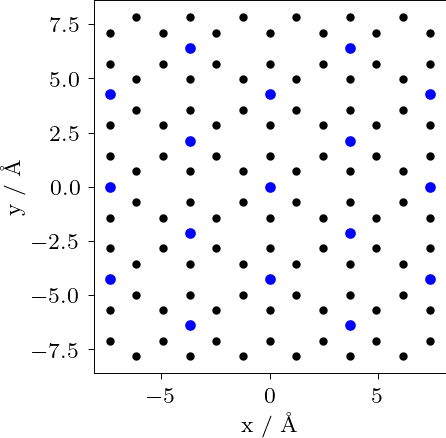

In [7]:
fig,ax = plt.subplots()
ax.scatter(C_positions[:,0],C_positions[:,1], s=4, color='k')
ax.scatter(He_positions[:,0],He_positions[:,1], s=8, color='b')

ax.set_aspect('equal')
ax.set_xlabel('x  /  Å')
ax.set_ylabel('y  /  Å')

### Visualizing the Lattice Vectors

Text(0, 0.5, 'y  /  Å')

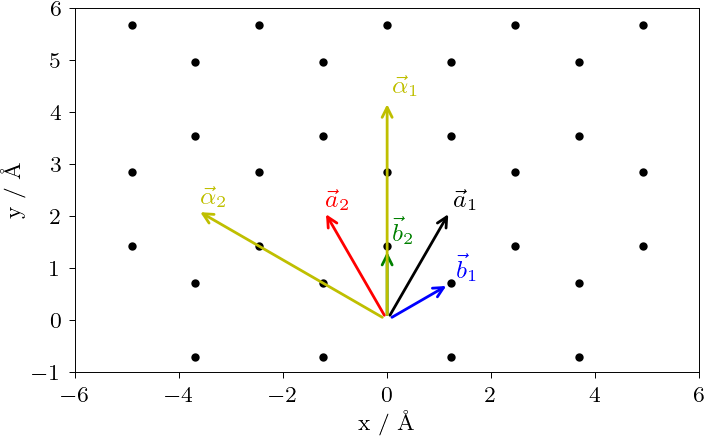

In [8]:
fig,ax = plt.subplots()
#ax.scatter(He_positions[:,0],He_positions[:,1], s=8, color='b')

ax.annotate("",
            xy=(a[0,0], a[1,0]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='k'),
            )
ax.annotate(r"$\vec{a}_1$",
            xy=(a[0,0], a[1,0]), xycoords='data',
            xytext=(1, 1), textcoords='offset points',
            )

ax.annotate("",
            xy=(a[0,1], a[1,1]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='r'),
            )
ax.annotate(r"$\vec{a}_2$",
            xy=(a[0,1], a[1,1]), xycoords='data',
            xytext=(1, 1), textcoords='offset points', color='r'
            )

ax.annotate("",
            xy=(b[0,0], b[1,0]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='b'),
            )

ax.annotate(r"$\vec{b}_1$",
            xy=(b[0,0], b[1,0]), xycoords='data',
            xytext=(2, 2), textcoords='offset points', color='b'
            )

ax.annotate("",
            xy=(b[0,1], b[1,1]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='g'),
            )
ax.annotate(r"$\vec{b}_2$",
            xy=(b[0,1], b[1,1]), xycoords='data',
            xytext=(2, 2), textcoords='offset points', color='g'
            )

ax.annotate("",
            xy=(α[0,0], α[1,0]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='y'),
            )
ax.annotate(r"$\vec{\alpha}_1$",
            xy=(α[0,0], α[1,0]), xycoords='data',
            xytext=(2, 2), textcoords='offset points', color='y'
            )

ax.annotate("",
            xy=(α[0,1], α[1,1]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='y',zorder=-10),
            )
ax.annotate(r"$\vec{\alpha}_2$",
            xy=(α[0,1], α[1,1]), xycoords='data',
            xytext=(2, 2), textcoords='offset points', color='y',zorder=-10
            )

ax.scatter(C_positions[:,0],C_positions[:,1], s=4, color='k')


ax.set_aspect('equal')
ax.set_xlim(-6,6)
ax.set_ylim(-1,6)
ax.set_xlabel('x  /  Å')
ax.set_ylabel('y  /  Å')

### The Bonds

Text(0, 0.5, 'y  /  Å')

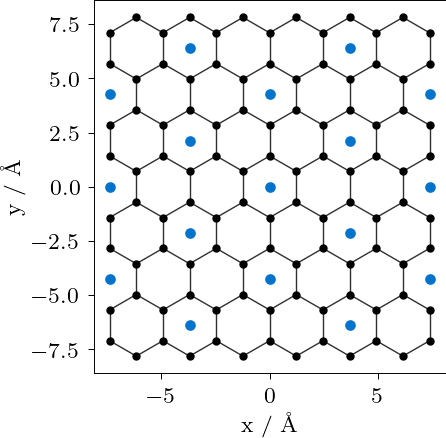

In [9]:
bonds = np.empty([0,4])
fig,ax = plt.subplots()

NG = len(C_positions)
for i in range(NG):
    ri = C_positions[i]
    for j in range(i,NG):
        rj = C_positions[j]
        d = np.linalg.norm(ri-rj)
        if d > 0.1 and d < (aₒ+0.1):
            ax.plot([ri[0],rj[0]],[ri[1],rj[1]],'-', zorder=-1, lw=0.5,color=grey)
            bonds = np.vstack((bonds,[ri[0],rj[0],ri[1],rj[1]]))
            
ax.scatter(C_positions[:,0],C_positions[:,1], s=4, color='k')
ax.scatter(He_positions[:,0],He_positions[:,1], s=8, color=blue)
ax.set_aspect('equal')
ax.set_xlabel('x  /  Å')
ax.set_ylabel('y  /  Å')

In [10]:
x,y = C_positions[:,0],C_positions[:,1]
x1,x2,y1,y2 = bonds[:,0],bonds[:,1],bonds[:,2],bonds[:,3]

## Create a graphic of the dual triangular lattice

In [11]:
dual_bonds = np.empty([0,4])

NA = len(hex_centers)
for i in range(NA):
    ri = hex_centers[i]
    for j in range(i,NA):
        rj = hex_centers[j]
        d = np.linalg.norm(ri-rj)
        if d > 0.1 and d < (np.sqrt(3)*aₒ+0.1):
            dual_bonds = np.vstack((dual_bonds,[ri[0],rj[0],ri[1],rj[1]]))

## A Graphene Adsorption Cell
### Setting the colors and sizes for some objects

In [12]:
col_C = Texture(Finish('ambient','0.2','diffuse','0.8'),Pigment('color',brown,'transmit',0.0))
col_bond = Texture(Finish('phong','0.2'),Pigment('color',brown,'transmit',0.0))
col_He = Texture(Finish('phong','0.9','phong_size',400),Pigment('color',blue,'transmit',0.0))
col_He_trans = Texture(Finish('phong','0.4','phong_size',400),Pigment('color',blue,'transmit',0.8))

He_green = True
if He_green:
    col_He = Texture(Finish('phong','0.9','phong_size',400),Pigment('color',green,'transmit',0.0))

col_box = Texture(Finish('specular',0.5,'roughness',0.001,
                        'ambient',0,'diffuse',0.6,'conserve_energy'),
                    Pigment('color','Gray','transmit',0.0))

col_int = Texture(Finish('specular',0.5,'roughness',0.001,
                        'ambient',0,'diffuse',0.6,'conserve_energy'),
                    Pigment('color','Gray','transmit',0.5))

col_floor = Texture(Pigment('color','White','transmit',0.0))
col_He_orange = Texture(Finish('phong','0.9','phong_size',400),Pigment('color',orange,'transmit',0.0))



r_C = 0.30 # radius of C-atoms in graphene
r_He = 1.4*r_C #/2.258# radius of He-atoms 

## V and V' for He on Graphene

In [13]:
sphere = [Sphere([x[i],0, y[i]], r_C, col_C) for i in range(len(x)) if x[i]**2+y[i]**2 <= 9*aₒ**2]

cylinder = [Cylinder([x1[i],0.0,y1[i]],[x2[i],0.0,y2[i]], 0.075,col_bond) for i in range(len(x1))
           if x1[i]**2+y1[i]**2 <= 9*aₒ**2 and x2[i]**2+y2[i]**2 <= 9*aₒ**2 ]

path_interior = Interior(Media('emission',np.array(blue)*2))

sphere.extend([Sphere([0,1.5,0], r_He, col_He)])
sphere.extend([Sphere([-a[0,0],1.5,a[1,0]], r_He, col_He)])
sphere.extend([Sphere([-a[0,0],1.5,-a[1,0]], r_He, col_He)])
#sphere.extend([Sphere([2*a[0,0],1.5,0], r_He, col_He)])

cone = []

In [14]:
def sweep(start,end,num_points,min_rad,max_rad,grow=False):
    ''' Return sphere_sweep details.'''

    # generate the points
    v = np.array(end) - np.array(start)
    dv = v/(num_points-1)
    
    dr = (max_rad-min_rad)/(num_points-1)
    if grow:
        max_rad,min_rad = min_rad,max_rad
        dr *= -1

    path = []
    for n in range(num_points):
        path.append(list(start + dv*n))
        path.append(min_rad + dr*n)

    return path

In [15]:
len_sweep = 40
path = sweep([2*a[0,0],1.5,0],[0,1.5,0],len_sweep, 0.25*r_He, 0.5*r_He)
path_interior = Interior(Media('emission',np.array(blue)*2))
ss = [SphereSweep('cubic_spline',len_sweep,*path,Pigment('color',blue,'transmit',0.8),
                  'hollow',path_interior)]

#sphere.extend([Sphere([0,1.5,0], r_He, Pigment('color',blue,'transmit',1.0),'hollow',path_interior)])

In [16]:
def get_arrow(start,end,z,color):
    
    start = np.array(start)
    end = np.array(end)
    
    vec = end-start
    length = np.linalg.norm(vec)
    norm = np.array([np.sqrt(vec[1]**2/(vec[0]**2+vec[1]**2)),0])
    norm[1] = np.sqrt(1.0-norm[0]**2)
    
    α = 0.2
    width = 0.25
    δ = 0.05

    shaft_left_corner = start - 0.5*width*norm
    shaft_right_corner = start + (1-0.99*α)*vec + 0.5*width*norm
    shaft = Box([shaft_left_corner[0],z-δ,shaft_left_corner[1]],[shaft_right_corner[0],z+δ,shaft_right_corner[1]])

    # The arrow head
    tip = np.array(end)
    base = np.array(start) + (1.0-α)*vec

    left_corner = base + α*length*norm
    right_corner = base - α*length*norm

    head = Prism(z-δ,z+δ,3,tip,left_corner,right_corner)
    
    return Union(shaft,head,color)

In [17]:
arrow = [get_arrow([0,3.2],[0,4.5],0.0,col_He_orange)]
arrow += [get_arrow([0,-3.2],[0,-4.5],0.0,col_He_orange)]
arrow += [get_arrow([3.85,0],[5.15,0],0.0,col_He_orange)]
arrow += [get_arrow([-3.85,0],[-5.15,0],0.0,col_He_orange)]

In [18]:
cam = Camera('location',[0,40,0],'look_at',[0,1.5,0])
bg = Background("color", "White",'transmit',1.0)
lights = [LightSource([0,200,0], 'color','White','parallel')]
#lights.extend([LightSource([0,10,0], 'color','White','parallel')])
#lights.extend([LightSource( [0,-1,0], 'color','White', 'parallel','shadowless','point_at',[0,-2.5,0])])
lights.extend([LightSource( [0,6,-25], 'color','White shadowless')])

obj = [bg] + lights + sphere + cylinder + cone + ss + arrow
scene = Scene(camera=cam,objects=obj,included=included)
#scene.render('ipython', width=400, height=200,remove_temp=False)

#3840 x 2160 
filename = '../figures/V_Vp_He_graphene.png'
size = [5000,5000]
povstring = scene.render(filename, width=size[0], height=size[1],quality=11,antialiasing=0.2,
             output_alpha=True,remove_temp=False)

In [19]:
# autocrop the image
image = Image.open(filename)
cropped = image.crop(image.getbbox())
cropped.save(filename)

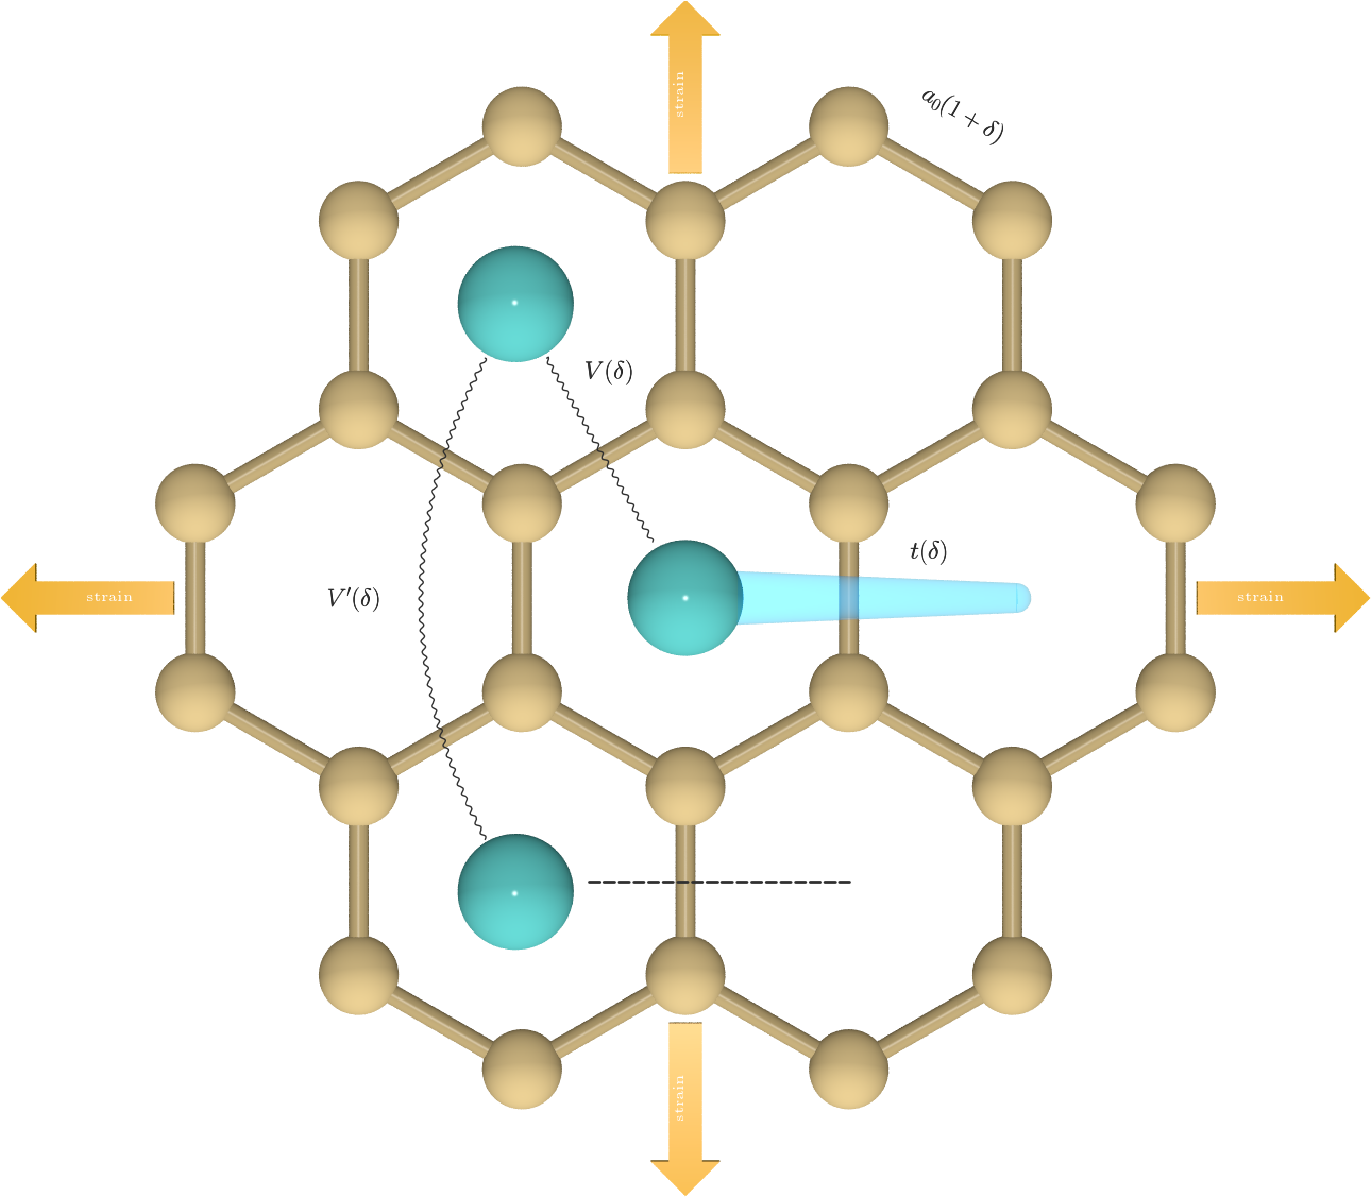

In [36]:
def get_unit_vec(start,end):
    end = np.array(end)
    start = np.array(start)
    vec = end-start
    length = np.linalg.norm(vec)
    vec /= length
    return vec,length

import matplotlib as mpl
import matplotlib.patheffects as path_effects
from Bezier import Bezier


fig,ax = plt.subplots(figsize=(2*figsize[0],2*figsize[0]),constrained_layout=True)
im = plt.imread('../figures/V_Vp_He_graphene.png')
ax.imshow(im,interpolation='none',extent=[-5.15,5.15,-4.5,4.5])

# # V interaction
# start,end = [0,0],[-a[0,0],a[1,0]]
# vec,length = get_unit_vec(start,end)
# V = np.array(pypov.generate_linear_path(start + 0.2*length*vec, end - 0.15*length*vec,200))
# Vtext = start + 0.66*vec*length
# Vtext[0] += 0.2

# # V' interaction
# start,end = [-a[0,0],-a[1,0]],[-a[0,0],a[1,0]]
# mid = [-2.5*a[0,0],0]
# vec1,length1 = get_unit_vec(start,mid)
# vec2,length2 = get_unit_vec(mid,end)
# Vptext = mid
# Vptext[0] += 1

# V interaction
start,end = [0,0],[-a[0,0],a[1,0]]
vec,length = get_unit_vec(start,end)
V = np.array(dgutils.pypov.generate_linear_path(start + 0.2*length*vec, end - 0.15*length*vec,200))
Vtext = start + 0.66*vec*length
Vtext[0] += 0.25
Vtext[1] += 0.3

# V' interaction
start,end = [-a[0,0],-a[1,0]],[-a[0,0],a[1,0]]
mid = [-2.5*a[0,0],0]
vec1,length1 = get_unit_vec(start,mid)
vec2,length2 = get_unit_vec(mid,end)
Vptext = mid
Vptext[0] += 0.6

t_points = np.linspace(0, 1, 500) 
points = np.array([start + 0.15*length1*vec1,mid,end - 0.15*length2*vec2])
curve = Bezier.Curve(t_points, points)

vec,length = get_unit_vec(start,end)

with mpl.rc_context({'path.sketch': (2, 10, 1)}):
    ax.plot(V[:,0],V[:,1], lw=0.5, color=grey)
    ax.plot(curve[:,0],curve[:,1], lw=0.5, color=grey)
    
# Plot the distance between two points
_x0 = [-a[0,0]+0.5,a[0,0]]
_y0 = [-a[1,0],-a[1,0]]
ax.plot(_x0,_y0, lw=1, color=grey, ls='--')


# Add some text labels
dgutils.fonts.set_custom_font(font_path)
path_eff = [path_effects.withSimplePatchShadow(offset=(0.1, -0.1), shadow_rgbFace='k', alpha=1.0)]

# ax.text(*Vtext,r'$V$',ha='center',va='center', fontsize=18, color=grey,
#         path_effects=path_eff)
# ax.text(*Vptext,r'$V\prime$',ha='center',va='center', fontsize=18, color=grey,
#         path_effects=path_eff)
# ax.text(1.2*a[0,0],0.3,r'$t$',ha='center',va='center', fontsize=18, color=grey,
#         path_effects=path_eff)
# ax.text(1.55,1.33*a[1,0],r'$a_0(1+\delta)$',ha='center',va='center', fontsize=18, color=grey,
#         path_effects=path_eff, rotation=-30)

ax.text(*Vtext,r'$V(\delta)$',ha='center',va='center', color=grey,
        path_effects=path_eff)
ax.text(*Vptext,r'$V^\prime(\delta)$',ha='center',va='center', color=grey,
        path_effects=path_eff)
ax.text(1.5*a[0,0],0.35,r'$t(\delta)$',ha='center',va='center', color=grey,
        path_effects=path_eff)
ax.text(2.12,1.7*a[1,0],r'$a_0(1+\delta)$',ha='center',va='center', color=grey,
        path_effects=path_eff, rotation=-30)

ax.text(4.15,0.01,'strain',va='center',color='white',fontsize=5)
ax.text(-4.15,0.01,'strain',ha='right',va='center',color='white',fontsize=5)

ax.text(-0.09,3.8,'strain',va='center',color='white',rotation=90,fontsize=5)
ax.text(-0.09,-3.75,'strain',va='center',ha='left',color='white',rotation=90,fontsize=5)

ax.axis('off');
plt.savefig('../figures/biaxial_strain.pdf')

In [24]:
[start[0],mid[0],end[0]]

[-1.2297560733739028, -1.8446341100608543, -1.2297560733739028]

In [238]:
end

array(-1.22975607)